# Chapter III - Pandas (Data Analysis)

In this notebook we will cover how to leverage other inbuilt methods of `pandas`, to perform:
- statistical description
- data analysis
- plotting (hist/scatter/boxplot)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

Let's resume things from where we've left them. We load back the dataframe that we had exported at the end of the previous notebook.

In [2]:
df = pd.read_csv('df_musk_final.csv')

## Section (1): The `.describe()` method

The `.describe()` method is a very handy tool, that provides summary statistics at a glance:

In [4]:
df.describe()

,id,hour,tweet_length,tweet_nbwords,tweet_nbmentions
count,2.819000e+03,2819.000000,2819.000000,2819.000000,2819.000000
mean,5.804848e+17,12.782547,100.408301,14.739979,0.789287
std,2.186404e+17,7.611198,40.551604,6.788773,0.849338
min,1.543473e+10,0.000000,4.000000,1.000000,0.000000
25%,3.506818e+17,5.000000,68.000000,9.000000,0.000000
50%,6.569719e+17,15.000000,111.000000,16.000000,1.000000
75%,7.704732e+17,19.000000,132.000000,20.000000,1.000000
max,8.496369e+17,23.000000,262.000000,31.000000,6.000000


❓ Why are some columns missing in the summary table?

- To include all columns, you may use:

In [5]:
df.describe(include='all')

,id,created_at,tweet,day,hour,tweet_length,tweet_link,tweet_nbwords,tweet_mentions,tweet_nbmentions
count,2.819000e+03,2819,2819,2819,2819.000000,2819.000000,2819,2819.000000,1645,2819.000000
unique,NaN,2819,2819,7,NaN,NaN,2819,NaN,1217,NaN
top,NaN,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...,Friday,NaN,NaN,https://x.com/i/web/status/849636868052275200,NaN,@SpaceX:,NaN
freq,NaN,1,1,530,NaN,NaN,1,NaN,75,NaN
mean,5.804848e+17,NaN,NaN,NaN,12.782547,100.408301,NaN,14.739979,NaN,0.789287
std,2.186404e+17,NaN,NaN,NaN,7.611198,40.551604,NaN,6.788773,NaN,0.849338
min,1.543473e+10,NaN,NaN,NaN,0.000000,4.000000,NaN,1.000000,NaN,0.000000
25%,3.506818e+17,NaN,NaN,NaN,5.000000,68.000000,NaN,9.000000,NaN,0.000000
50%,6.569719e+17,NaN,NaN,NaN,15.000000,111.000000,NaN,16.000000,NaN,1.000000
75%,7.704732e+17,NaN,NaN,NaN,19.000000,132.000000,NaN,20.000000,NaN,1.000000


- ❓ How would you access the descriptive statistics of _one_ column?
- ❓ What is the datatype of such stats for _one_ column?

In [6]:
# your answer here:

## Section (2): `pandas` plotting

A properly structured `DataFrame`, with adequate datatypes, makes plotting really easy and fast.

There are two ways to tackle plotting the data in a dataframe column:

- (1) Extract the column and plot it using embedded methods.
    ```python
        df['ColumnToPlot'].plot()
    ```
- (2) Plot the dataframe using embedded methods, specifying in the arguments which columns you want to represent.
    ```python
        df.plot(column='ColumnToPlot')
    ```
These two possibilities are equivalent most of the time. (As your plot becomes more complex, you might however want to prefer the second option which allows to leverage other columns as well.)

❗ Generally, unless all your columns are numerical values of comparable meaning, you will need to specify which kind of plot you want: 
- bar
- scatter
- hist
- box
- etc.

<img src='../data//pandas_plot.png' width='1200px'>

### A) Basic plotting

As a first example, to plot a histogram of the number of words in the tweets, you can use:
- method (1)
    ``` python
    df['tweet_nbwords'].plot.hist()
    ```
- method (2)
    ``` python
    df.plot.hist(column='tweet_nbwords')
    ```

Try both methods! 

- ❓ Where would you specify the number of bins, by passing the argument `bins=100` in the method?
- ❓ What if you wanted to do a scatter plot? For example comparing the number of words to the number of mentions? You might need the arguments `x=` and `y=`.

In [49]:
# Your answer here:

✏️ [Ex.1] Using different elements from past notebooks:
- Convert the "created_at" column into a `pd.datetime` datatype
- Produce a scatter plot of the tweet length vs. date
- Plot a histogram of the tweet length.
- Use the graph to investigate which tweets are the longest, and why?
- ❓ What about the 140-character limit? Is this applicable here? Why not?


In [40]:
# your answer here:

---

### B) Multi-variable plotting

Like the `.groupby()` logic, you might want to compare at once the evolution of one variable accoring to another one. This can be easily done in `pandas`.

For example, to plot a histogram of the hour at which tweets are published is done by:
    
```python
    df.hist(column='hour')
```

array([[<Axes: title={'center': 'hour'}>]], dtype=object)

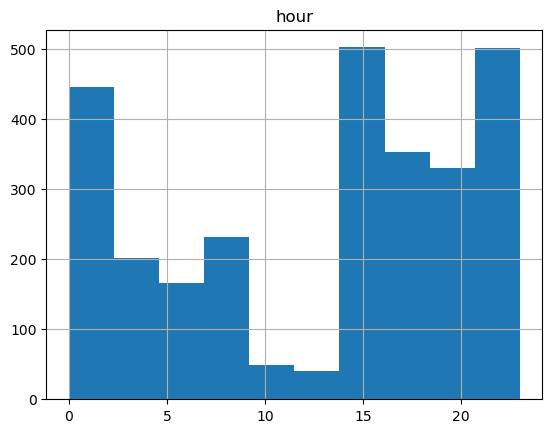

In [58]:
df.hist(column='hour')

But if you modify the arguments of method, and specify the `by=` parameter:
    
```python
    df.hist(column='hour', by='day')
```

You plot as many histograms as there are values of `day`.

array([[<Axes: title={'center': 'Friday'}>,
        <Axes: title={'center': 'Monday'}>,
        <Axes: title={'center': 'Saturday'}>],
       [<Axes: title={'center': 'Sunday'}>,
        <Axes: title={'center': 'Thursday'}>,
        <Axes: title={'center': 'Tuesday'}>],
       [<Axes: title={'center': 'Wednesday'}>, <Axes: >, <Axes: >]],
      dtype=object)

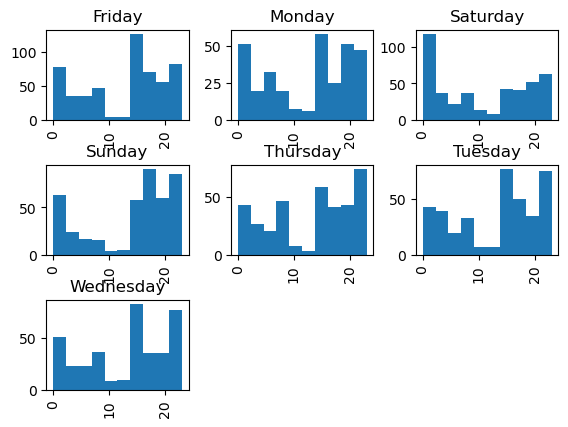

In [61]:
df.hist(column='hour', by='day')

### C) Boxplots

For scenarios which require a finer statistical analysis of the data, boxplots are often a good choice as they represent:
- median
- 25th and 75th percentiles
- upper and lower whisker ends
- outliers

To show the boxplot (or whisker plot) of one variable, you can do the following:
```python
    df[['Variable']].boxplot()
```

<Axes: >

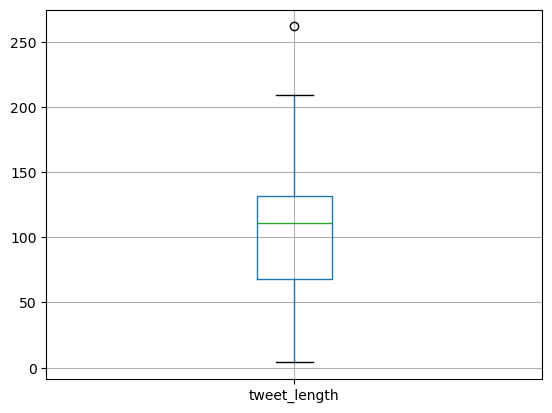

In [63]:
df[['tweet_length']].boxplot()

But you can have that same multi-variable logic, and thus get as many whisker plots of variable A as there values of variable B.

For example, if we want to show the statistics of the tweet length by day of the week, we can do:
```python
    df[['tweet_length', 'day']].boxplot(by='day')
```

<Axes: title={'center': 'tweet_length'}, xlabel='[day]'>

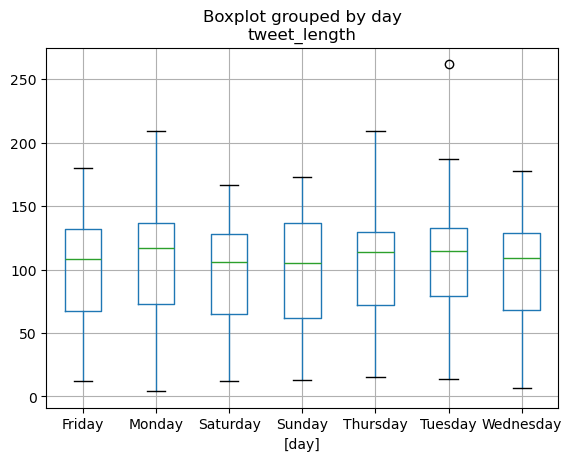

In [64]:
df[['tweet_length', 'day']].boxplot(by='day')